<a href="https://colab.research.google.com/github/Reza-aghajari/ML2023/blob/main/P1Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1oibux5Yko5FCxJ2mJd6aRnr_mX4NkRE9

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1oibux5Yko5FCxJ2mJd6aRnr_mX4NkRE9
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 52.4MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/data_banknote_authentication.txt' ,header=None)
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
columns_name = ['variance','skewness','curtosis','entropy','target']
df.columns = columns_name
df

,variance,skewness,curtosis,entropy,target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df_shuffled = df.sample(frac=1,random_state=83)
df_shuffled.reset_index(inplace = True, drop = True)
df_shuffled

,variance,skewness,curtosis,entropy,target
0,-0.83535,0.80494,-1.64110,-0.19225,1
1,-2.56400,-1.70510,1.50260,0.32757,1
2,-3.46050,2.69010,0.16165,-1.02240,1
3,-2.00420,-9.36760,9.33330,-0.10303,1
4,0.80355,2.84730,4.34390,0.60170,0
...,...,...,...,...,...
1367,-0.72068,-6.75830,5.84080,0.62369,1
1368,-3.75030,-13.45860,17.59320,-2.77710,1
1369,-3.35530,0.35591,2.64730,-0.37846,1
1370,-2.88290,3.89640,-0.18880,-1.16720,1


In [5]:
X = df_shuffled.iloc[:, 0:4]
y = df_shuffled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=83)


In [6]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

def logistic_regression(x,w):
  y_hat = sigmoid(x @ w)
  return y_hat

def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))
  return loss

def gradient(x, y, y_hat):
  grads = (x.T @ (y_hat - y)) / len(y)
  return grads

def gradient_descent(w, eta, grads):
  w -= eta*grads
  return w

def accuracy(y , y_hat):
  acc = np.sum(y == np.round(y_hat)) / len(y)
  return acc

In [7]:
X_train = np.asarray(X_train)

X_train = np.hstack((np.ones((len(X_train), 1)), X_train))

print(X_train)

[[ 1.       -1.7322   -9.2828    7.719    -1.7168  ]
 [ 1.       -0.16108  -6.4624    8.3573   -1.5216  ]
 [ 1.       -0.7869    9.5663   -3.7867   -7.5034  ]
 ...
 [ 1.        0.86816  10.2429   -1.4912   -4.0082  ]
 [ 1.        2.0962    2.4769    1.9379   -0.040962]
 [ 1.        0.58836  10.7727   -1.3884   -4.3276  ]]


In [8]:
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

In [9]:
w = np.random.randn(5,1)
eta = 0.01
n_epochs = 2000

Epoch=99,	 E=0.3137, 	 w=[-0.58640203 -0.86767074 -0.43622896 -0.47501657  0.14399561]
Epoch=199,	 E=0.2143, 	 w=[-0.43567442 -1.03007977 -0.41595177 -0.4369319  -0.05515734]
Epoch=299,	 E=0.1843, 	 w=[-0.32254247 -1.10678405 -0.43751527 -0.45650633 -0.15404539]
Epoch=399,	 E=0.1667, 	 w=[-0.22665354 -1.15763971 -0.47220934 -0.48890346 -0.21266019]
Epoch=499,	 E=0.1537, 	 w=[-0.14114744 -1.19663215 -0.50846515 -0.52476927 -0.25094474]
Epoch=599,	 E=0.1434, 	 w=[-0.06286957 -1.22912884 -0.54283584 -0.56034226 -0.27759445]
Epoch=699,	 E=0.1347, 	 w=[ 0.00985251 -1.25757619 -0.57451029 -0.59423396 -0.29689177]
Epoch=799,	 E=0.1274, 	 w=[ 0.07802743 -1.28323137 -0.60349384 -0.62604674 -0.31119079]
Epoch=899,	 E=0.1209, 	 w=[ 0.14233144 -1.30681007 -0.63002678 -0.65577376 -0.32190912]
Epoch=999,	 E=0.1153, 	 w=[ 0.20325559 -1.32875728 -0.65439498 -0.68355036 -0.3299636 ]
Epoch=1099,	 E=0.1103, 	 w=[ 0.26117759 -1.34937098 -0.6768689  -0.70955305 -0.33598077]
Epoch=1199,	 E=0.1058, 	 w=[ 0.3

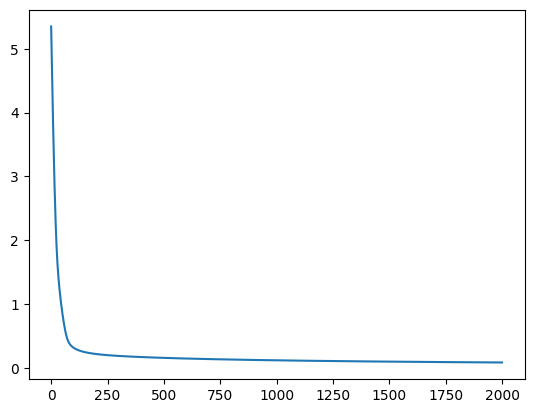

In [10]:
error_hist = []

for epoch in range(n_epochs):
  y_hat = logistic_regression(X_train, w)

  e = bce(y_train, y_hat)
  error_hist.append(e)

  grads = gradient(X_train, y_train, y_hat)

  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 == 0:
    print(f'Epoch={epoch},\t E={e:.4f}, \t w={w.T[0]}')

plt.plot(error_hist)

In [11]:
X_test = np.asarray(X_test)
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))

print(X_test)


[[ 1.       1.8967  -2.5163   2.8093  -0.79742]
 [ 1.      -1.4454  -8.4385   8.8483   0.96894]
 [ 1.       4.1654  -3.4495   3.643    1.0879 ]
 ...
 [ 1.      -2.899   -0.60424  2.6045   1.3776 ]
 [ 1.       1.645    7.8612  -0.87598 -3.5569 ]
 [ 1.       1.5268  -5.5871   8.6564  -1.722  ]]


In [12]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_hat = np.array(y_hat)
y_hat = y_hat.reshape(-1,1)

In [15]:
w=[ 0.68461944, -1.49800794, -0.82368371, -0.88792286, -0.34575079]
w = np.array(w)
w = w.reshape(-1,1)

In [14]:
y_hat = logistic_regression(X_test,w)
accuracy(y_test, y_hat)

0.9781818181818182

In [16]:
normalized_df = (df - df.min())/(df.max()-df.min())
normalized_df

,variance,skewness,curtosis,entropy,target
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0
1368,0.407690,0.332868,0.506753,0.808350,1.0
1369,0.237385,0.011768,0.985603,0.524755,1.0
1370,0.250842,0.201701,0.761587,0.660675,1.0


In [23]:
X1 = normalized_df.iloc[:, 0:4]
y1 = normalized_df.iloc[:, -1]

X_train1,X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2,random_state=83)
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape


((1097, 4), (1097,), (275, 4), (275,))

In [24]:
X_train1 = np.asarray(X_train1)

X_train1 = np.hstack((np.ones((len(X_train1), 1)), X_train1))

y_train1 = np.array(y_train1)
y_train1 = y_train1.reshape(-1,1)

w = np.random.randn(5,1)

Epoch=99,	 E=0.7921, 	 w=[-0.85612809 -0.17388469  0.1921497   0.63708528  1.90312841]
Epoch=199,	 E=0.7024, 	 w=[-1.01850487 -0.3347291   0.06093392  0.595203    1.77636964]
Epoch=299,	 E=0.6680, 	 w=[-1.10224522 -0.45114894 -0.022739    0.57505788  1.70261527]
Epoch=399,	 E=0.6535, 	 w=[-1.13884102 -0.54070903 -0.07805395  0.56801081  1.66100317]
Epoch=499,	 E=0.6459, 	 w=[-1.14795425 -0.61439957 -0.11677954  0.56851985  1.63824201]
Epoch=599,	 E=0.6407, 	 w=[-1.14106759 -0.67863226 -0.1457173   0.57329677  1.62649263]
Epoch=699,	 E=0.6364, 	 w=[-1.12483874 -0.73711998 -0.16878776  0.58041838  1.62118678]
Epoch=799,	 E=0.6324, 	 w=[-1.10315454 -0.79202927 -0.18827385  0.58875798  1.61965073]
Epoch=899,	 E=0.6286, 	 w=[-1.07830243 -0.84463616 -0.20551936  0.59765319  1.6203094 ]
Epoch=999,	 E=0.6250, 	 w=[-1.05163695 -0.89569823 -0.22132246  0.60671419  1.62223034]
Epoch=1099,	 E=0.6214, 	 w=[-1.02396344 -0.94566833 -0.23616098  0.61571221  1.62485989]
Epoch=1199,	 E=0.6179, 	 w=[-0.9

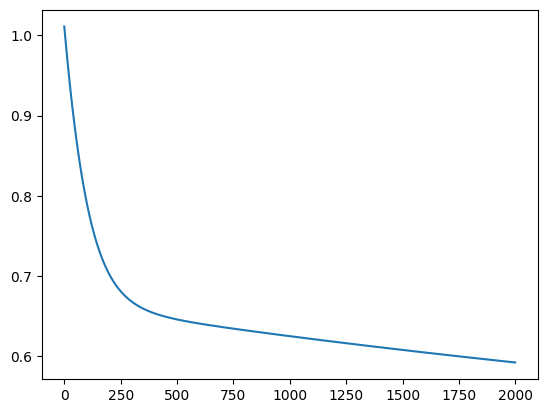

In [25]:
error_hist = []

for epoch in range(n_epochs):
  y_hat = logistic_regression(X_train1, w)

  e = bce(y_train1, y_hat)
  error_hist.append(e)

  grads = gradient(X_train1, y_train1, y_hat)

  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 == 0:
    print(f'Epoch={epoch},\t E={e:.4f}, \t w={w.T[0]}')

plt.plot(error_hist)

In [26]:
w=[-0.76976632, -1.36963813, -0.3511604,   0.68334277,  1.65302716]
w = np.array(w)
w = w.reshape(-1,1)

X_test1 = np.asarray(X_test1)
X_test1 = np.hstack((np.ones((len(X_test1), 1)), X_test1))

y_test1 = np.array(y_test1)
y_test1 = y_test1.reshape(-1,1)
y_hat = np.array(y_hat)
y_hat = y_hat.reshape(-1,1)

y_hat = logistic_regression(X_test1,w)
accuracy(y_test1, y_hat)

0.7054545454545454

In [27]:
y_hat[:5]

array([[0.44741773],
       [0.54073099],
       [0.48792671],
       [0.59253899],
       [0.47394796]])

In [28]:
a=df[df['target']==1]
b=df[df['target']==0]
print(f'len a:{len(a)}')
print(f'len b:{len(b)}')

len a:610
len b:762


In [29]:
new_rows = pd.DataFrame()

for i in range(len(b)-len(a)):
  v= a.iloc[i:i+2, :-1].mean()

  new_row = v.append(pd.Series({'target': 1}))
  new_rows = new_rows.append(new_row, ignore_index=True)


a.reset_index(drop=True, inplace=True)
new_rows.reset_index(drop=True, inplace=True)

updated_df = pd.concat([a.reset_index(drop=True), new_rows], ignore_index=True)

updated_df

<ipython-input-29-2c34d742f842>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = v.append(pd.Series({'target': 1}))
<ipython-input-29-2c34d742f842>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)
<ipython-input-29-2c34d742f842>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = v.append(pd.Series({'target': 1}))
<ipython-input-29-2c34d742f842>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)
<ipython-input-29-2c34d742f842>:6: FutureWarning: The series.append method is deprecated and will be removed from pand

,variance,skewness,curtosis,entropy,target
0,-1.39710,3.31910,-1.392700,-1.994800,1.0
1,0.39012,-0.14279,-0.031994,0.350840,1.0
2,-1.66770,-7.15350,7.892900,0.967650,1.0
3,-3.84830,-12.80470,15.682400,-1.281000,1.0
4,-3.56810,-8.21300,10.083000,0.967650,1.0
...,...,...,...,...,...
757,-0.58961,-6.37235,4.711900,-0.308000,1.0
758,1.29199,-0.80495,-0.653650,0.551902,1.0
759,1.62945,2.94145,-3.827800,-1.954748,1.0
760,-1.49850,5.15040,-2.242640,-4.729100,1.0


In [30]:
combined_df = updated_df.append(b)
combined_df

<ipython-input-30-9b7c210afdb9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = updated_df.append(b)


,variance,skewness,curtosis,entropy,target
0,-1.39710,3.31910,-1.392700,-1.99480,1.0
1,0.39012,-0.14279,-0.031994,0.35084,1.0
2,-1.66770,-7.15350,7.892900,0.96765,1.0
3,-3.84830,-12.80470,15.682400,-1.28100,1.0
4,-3.56810,-8.21300,10.083000,0.96765,1.0
...,...,...,...,...,...
757,2.66060,3.16810,1.961900,0.18662,0.0
758,3.93100,1.85410,-0.023425,1.23140,0.0
759,0.01727,8.69300,1.398900,-3.96680,0.0
760,3.24140,0.40971,1.401500,1.19520,0.0


In [31]:
X2 = combined_df.iloc[:,0:4]
y2 = combined_df.iloc[:,-1]

In [32]:
X_train2,X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,random_state=83)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((1219, 4), (1219,), (305, 4), (305,))

In [33]:
X_train2 = np.asarray(X_train2)
X_train2 = np.hstack((np.ones((len(X_train2), 1)), X_train2))

print(X_train2)

[[ 1.        -2.2482     3.0915    -2.3969    -2.6711   ]
 [ 1.         1.8216    -6.4748     8.0514    -0.41855  ]
 [ 1.        -2.3277     1.4381    -0.82114   -1.2862   ]
 ...
 [ 1.         4.2406    -2.4852     1.608      0.7155   ]
 [ 1.         3.9994     0.90427    1.1693     1.6892   ]
 [ 1.         0.0096613  3.5612    -4.407     -4.4103   ]]


In [34]:
y_train2 = np.array(y_train2)
y_train2 = y_train2.reshape(-1,1)

Epoch=99, 	 E=0.6023, 	 w=[-0.61016071 -1.58391463  0.13947897  0.09093629  1.17677523]
Epoch=199, 	 E=0.4383, 	 w=[-0.46471619 -1.66327849  0.0560959  -0.11119685  0.89014475]
Epoch=299, 	 E=0.3378, 	 w=[-0.33189703 -1.70444312 -0.05590733 -0.24304701  0.66519794]
Epoch=399, 	 E=0.2690, 	 w=[-0.21150281 -1.72442702 -0.15236362 -0.34650129  0.48238343]
Epoch=499, 	 E=0.2212, 	 w=[-0.10266485 -1.73275172 -0.23612176 -0.4287857   0.33458879]
Epoch=599, 	 E=0.1876, 	 w=[-0.00448121 -1.73449645 -0.30992415 -0.49562572  0.21673548]
Epoch=699, 	 E=0.1636, 	 w=[ 0.08424384 -1.73268584 -0.37541705 -0.55128765  0.12372855]
Epoch=799, 	 E=0.1459, 	 w=[ 0.1649089  -1.72918563 -0.43359604 -0.59882961  0.05033868]
Epoch=899, 	 E=0.1326, 	 w=[ 0.23885523 -1.72512706 -0.48532051 -0.64035587 -0.00808294]
Epoch=999, 	 E=0.1222, 	 w=[ 0.30721167 -1.72117285 -0.53143781 -0.677279   -0.05519316]
Epoch=1099, 	 E=0.1138, 	 w=[ 0.37087216 -1.71769529 -0.57273939 -0.71055796 -0.09369588]
Epoch=1199, 	 E=0.106

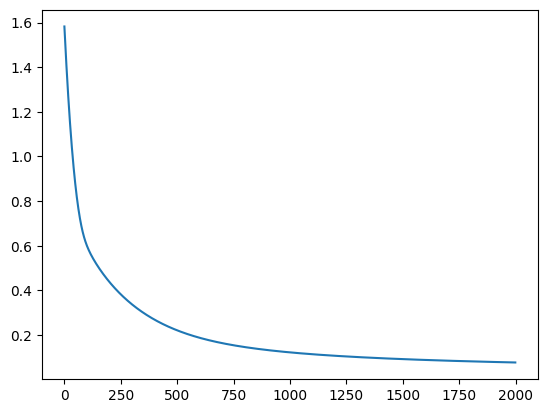

In [35]:
error_hist = []

for epoch in range(n_epochs):
  y_hat = logistic_regression(X_train2, w)

  e = bce(y_train2, y_hat)
  error_hist.append(e)

  grads = gradient(X_train2, y_train2, y_hat)

  w = gradient_descent(w, eta, grads)

  if (epoch+1) % 100 == 0:
    print(f'Epoch={epoch}, \t E={e:.4f}, \t w={w.T[0]}')

plt.plot(error_hist)

In [36]:
X_test2 = np.asarray(X_test2)
X_test2 = np.hstack((np.ones((len(X_test2), 1)), X_test2))

print(X_test2)

[[ 1.      -3.5681  -8.213   10.083    0.96765]
 [ 1.       4.5707   7.2094  -3.2794  -1.4944 ]
 [ 1.       5.0429  -0.52974  0.50439  1.106  ]
 ...
 [ 1.       3.8969   7.4163  -1.8245   0.14007]
 [ 1.       4.0715   7.6398  -2.0824  -1.1698 ]
 [ 1.       2.0911   0.94358  4.5512   1.234  ]]


In [37]:
y_test2 = np.array(y_test2)
y_test2 = y_test2.reshape(-1,1)
y_hat = np.array(y_hat)
y_hat = y_hat.reshape(-1,1)

In [40]:
w=[ 0.81089114, -1.71905596, -0.81284907, -0.91763976, -0.25551781]
w = np.array(w)
w = w.reshape(-1,1)

In [41]:
y_hat = logistic_regression(X_test2,w)
accuracy(y_test2, y_hat)

0.980327868852459

In [42]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

X_train3,X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(solver='sag', max_iter=2000, random_state=83)
model.fit(X_train3, y_train3)

LogisticRegression(max_iter=2000, random_state=83, solver='sag')

In [43]:
model.score(X_test3, y_test3)

0.9927272727272727

In [44]:
from sklearn.utils import resample

class_0 = df[df['target'] == 0]
class_1 = df[df['target'] == 1]

min_class_size = min(len(class_0), len(class_1))

balanced_class_0 = resample(class_0, replace=True, n_samples=min_class_size, random_state=83)
balanced_class_1 = resample(class_1, replace=True, n_samples=min_class_size, random_state=83)

balanced_df = pd.concat([balanced_class_0, balanced_class_1])

features = balanced_df.drop('target', axis=1)
target = balanced_df['target']

In [45]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(features, target, test_size=0.2, random_state=83)

model = LogisticRegression(solver='sag', max_iter=2000, random_state=83)
model.fit(X_train4, y_train4)

LogisticRegression(max_iter=2000, random_state=83, solver='sag')

In [46]:
accuracy = model.score(X_test4, y_test4)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918032786885246
